### Notebook basics
- Jupyter notebook script consists of code (and markdown) cells, like this one for notes.
- You can run code cells either all together OR ONE at a time
- escape leaves a cell, then a creates a new one above and b creates a new one below
- to execute a shell press shift+enter
- to execute a shell and create a new one below press alt+enter
- to print a variable, you can either type print(variablename) or just type variablename

### Variable assignment
- In a variable assignment in Python, no need to declare type

### Numerical Python and arrays
how to create arrays (from lists, from class functions, from other objects) and how to operate upon other arrays, numbers, etc

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#import os
#cwd=os.getcwd(); print(cwd)
#path='/Users/kdasyra/Desktop/ypologistiki/codes/'
#os.chdir(path)


In [18]:
# this is how the images were turned into fits files

#import matplotlib.image as pltim
#from astropy.io import fits


#image_png = pltim.imread('data/solar_spectrum.png')
#hdu = fits.ImageHDU()
#hdu.data = image_png
#hdu.writeto('data/solar_test.fits')

#image_png = pltim.imread('data/calibration_spectrum_He.tif')
#hdu = fits.ImageHDU()
#hdu.data = image_png
#hdu.writeto('data/calibration_spectrum_He.fits')

#image_png = pltim.imread('data/calibration_spectrum_Ne.tif')
#hdu = fits.ImageHDU()
#hdu.data = image_pnvg
#hdu.writeto('data/calibration_spectrum_Ne.fits')


In [23]:
# The measurements were taken in ds9 

x=np.array([61,98,128,302,341,456,553,598,612,995,1366,1540,1636])
y=np.array([3890,3965,4026,4388,4471,4713,4922,5016,5048,5876,6678,7065,7281])# Angstrom
dy=0.1*y


### Αναλυτικό χ^2

3745.39555833322 2.1463122092165334


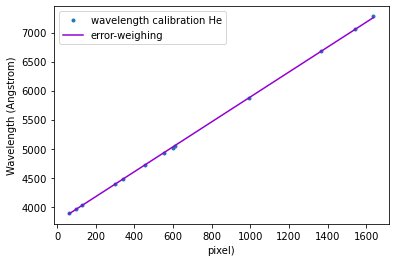

In [25]:
# Γραμμικό πρόβλημα, λυμμένο ήδη αναλυτικά με μέθοδο χ^2

# now with errors
m0=np.sum(y/(dy**2))
m1=np.sum(x*y/(dy**2))
s0=np.sum(x**0./dy**2)
s1=np.sum(x**1./dy**2)
s2=np.sum(x**2./dy**2)

p1=(m0/s0 - m1/s1)/(s1/s0-s2/s1)
p0=(m1-p1*s2)/s1

print(p0,p1)
plt.plot(x,y,'.',label="wavelength calibration He")

plt.xlabel('pixel)')
plt.ylabel('Wavelength (Angstrom)')
plt.legend()


plt.plot(x,p0+p1*x,label='error-weighing',color='darkviolet')
plt.legend()


In [24]:
def ff(x,p0,p1): return p0+p1*x


from scipy.optimize import curve_fit

popt = curve_fit(ff, x, y, sigma=dy)[0]

print(popt[0],popt[1])

3745.3955582268795 2.146312209439028


<class 'numpy.ndarray'>


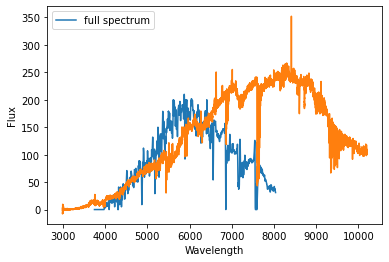

In [33]:
data = np.loadtxt('solar-spectrum-extracted.txt' )#,'formats': ('f4', 'f4')})


data[~np.isfinite(data)] = 0. # check is there is not-a-number anywhere. Tilda means the opposite

print(type(data)) #a column data[:,0] this is identical to data[0::,0]

x=data[:,0]
y=data[:,1]
plt.plot(p0+p1*x,y,label="full spectrum")

plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.legend()

galaxy = np.loadtxt('galaxy_spectrum.txt' )
#np.savetxt('solar-spectrum-extracted-calibrated.txt',p0+p1*x,y,fmt='%.4e')
plt.plot(galaxy[:,0]*10.,galaxy[:,1]/30)